In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
import tensorflow as tf

In [2]:
# Breast Cancer Dataset - Random Forest
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



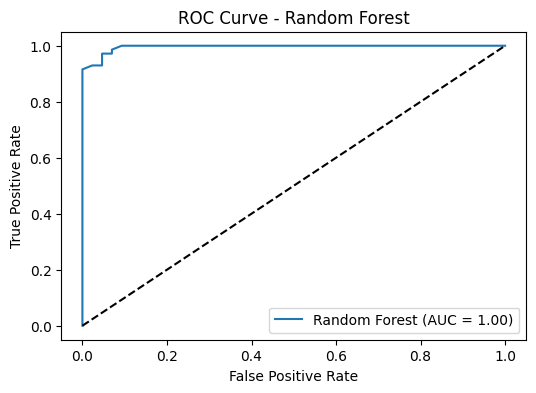

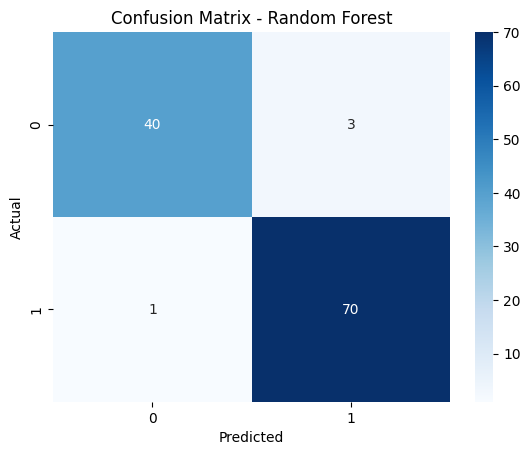

In [3]:
# RF ROC & Confusion Matrix
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()

conf_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [4]:
# Sentiment Analysis on small IMDB sample
from sklearn.datasets import fetch_20newsgroups

categories = ['rec.sport.baseball', 'sci.med']
news = fetch_20newsgroups(subset='train', categories=categories)
X_train, X_test, y_train, y_test = train_test_split(news.data, news.target, test_size=0.2, random_state=42)

pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression(max_iter=1000))
pipeline.fit(X_train, y_train)
y_pred_nlp = pipeline.predict(X_test)

print("Logistic Regression (NLP) Classification Report:")
print(classification_report(y_test, y_pred_nlp))

Logistic Regression (NLP) Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       122
           1       1.00      0.95      0.97       117

    accuracy                           0.97       239
   macro avg       0.98      0.97      0.97       239
weighted avg       0.98      0.97      0.97       239



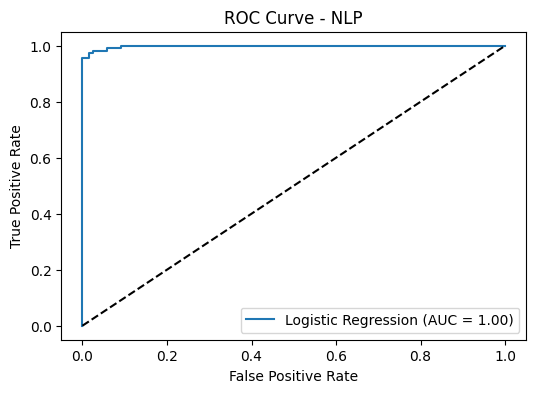

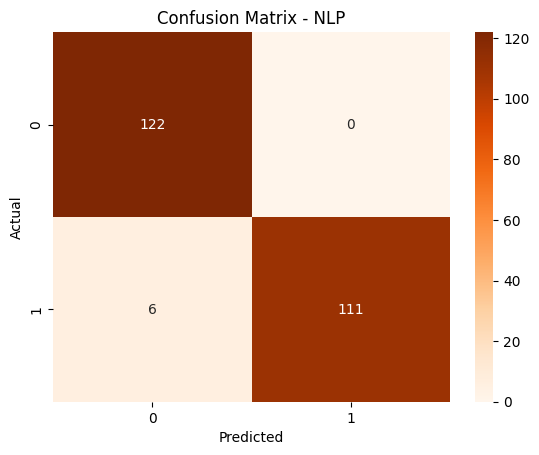

In [5]:
from sklearn.metrics import roc_auc_score

y_probs = pipeline.predict_proba(X_test)[:, 1]
fpr_nlp, tpr_nlp, _ = roc_curve(y_test, y_probs)
roc_auc_nlp = auc(fpr_nlp, tpr_nlp)

plt.figure(figsize=(6, 4))
plt.plot(fpr_nlp, tpr_nlp, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc_nlp))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - NLP')
plt.legend()
plt.show()

conf_nlp = confusion_matrix(y_test, y_pred_nlp)
sns.heatmap(conf_nlp, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - NLP')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
# Vision Model (lightweight) - ResNet50 on CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train_cat, y_test_cat = to_categorical(y_train, 10), to_categorical(y_test, 10)

base_model = ResNet50(weights=None, include_top=False, input_tensor=Input(shape=(32, 32, 3)))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train[:10000], y_train_cat[:10000], epochs=3, batch_size=64, validation_data=(X_test[:2000], y_test_cat[:2000]))
test_loss, test_acc = model.evaluate(X_test[:2000], y_test_cat[:2000])
print("ResNet50 Accuracy on CIFAR-10 Subset:", test_acc)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 32, 32, 3))
  warnings.warn(msg)


157/157 ━━━━━━━━━━━━━━━━━━━━ 719s 4s/step - accuracy: 0.1793 - loss: 2.4729 - val_accuracy: 0.1080 - val_loss: 2.8546
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 692s 4s/step - accuracy: 0.3538 - loss: 1.7311 - val_accuracy: 0.1190 - val_loss: 2.6863
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 726s 4s/step - accuracy: 0.3941 - loss: 1.6398 - val_accuracy: 0.3420 - val_loss: 1.8540
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 148ms/step - accuracy: 0.3365 - loss: 1.8606
ResNet50 Accuracy on CIFAR-10 Subset: 0.34200000762939453
